In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import linregress

import plotly
plotly.tools.set_credentials_file(username='8135tao', api_key='wyGWY4LmNGNohXtJ3vmo')
import plotly.plotly as py
import plotly.graph_objs as go


In [5]:
total_expo_bystate_mean_df=pd.read_csv('Total export by state.csv')
total_expo_bystate_mean_df.head()

,state,mean,code
0,Texas,228.96,TX
1,California,153.45,CA
2,New York,78.23,NY
3,Washington,69.04,WA
4,Illinois,58.50,IL


In [3]:
for col in total_expo_bystate_mean_df.columns:
    total_expo_bystate_mean_df[col] = total_expo_bystate_mean_df[col].astype(str)

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# scl = [[0.0, 'rgb(220,110,110)'],[0.2, 'rgb(180,90,90)'],[0.4, 'rgb(150,75,75)'],\
#             [0.6, 'rgb(120,60,60)'],[0.8, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

scl = [[0.0, 'rgb(220,110,110)'],[0.25, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

total_expo_bystate_mean_df['text'] = total_expo_bystate_mean_df['state'] + '<br>' +\
    'Average Export $'+total_expo_bystate_mean_df['mean']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        #locations = df['code'],
        locations = total_expo_bystate_mean_df['code'],
        #z = df['total exports'].astype(float),
        z = total_expo_bystate_mean_df['mean'].astype(float),
        locationmode = 'USA-states',
        text = total_expo_bystate_mean_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Billions USD"
        )
    ) ]

layout = dict(
        title = '2007-2017 Average Total Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'd3-cloropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~8135tao/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [6]:
mean_gdp_expo_impo_df=pd.read_csv('mean_impo_expo_gdp_country.csv')
mean_gdp_expo_impo_df.head()

,Country Name,mean export,mean import,mean gdp,mean balance
0,Canada,2.699056e+11,3.055898e+11,1.632974e+12,-3.568423e+10
1,Mexico,1.927332e+11,2.540406e+11,1.120824e+12,-6.130744e+10
2,China,9.855379e+10,4.000181e+11,7.784747e+12,-3.014643e+11
3,Japan,6.314260e+10,1.312997e+11,5.217301e+12,-6.815706e+10
4,United Kingdom,5.211265e+10,5.387572e+10,2.736682e+12,-1.763073e+09


R^2 value is 0.6436092145143223
p value is 1.4946693224086567e-36


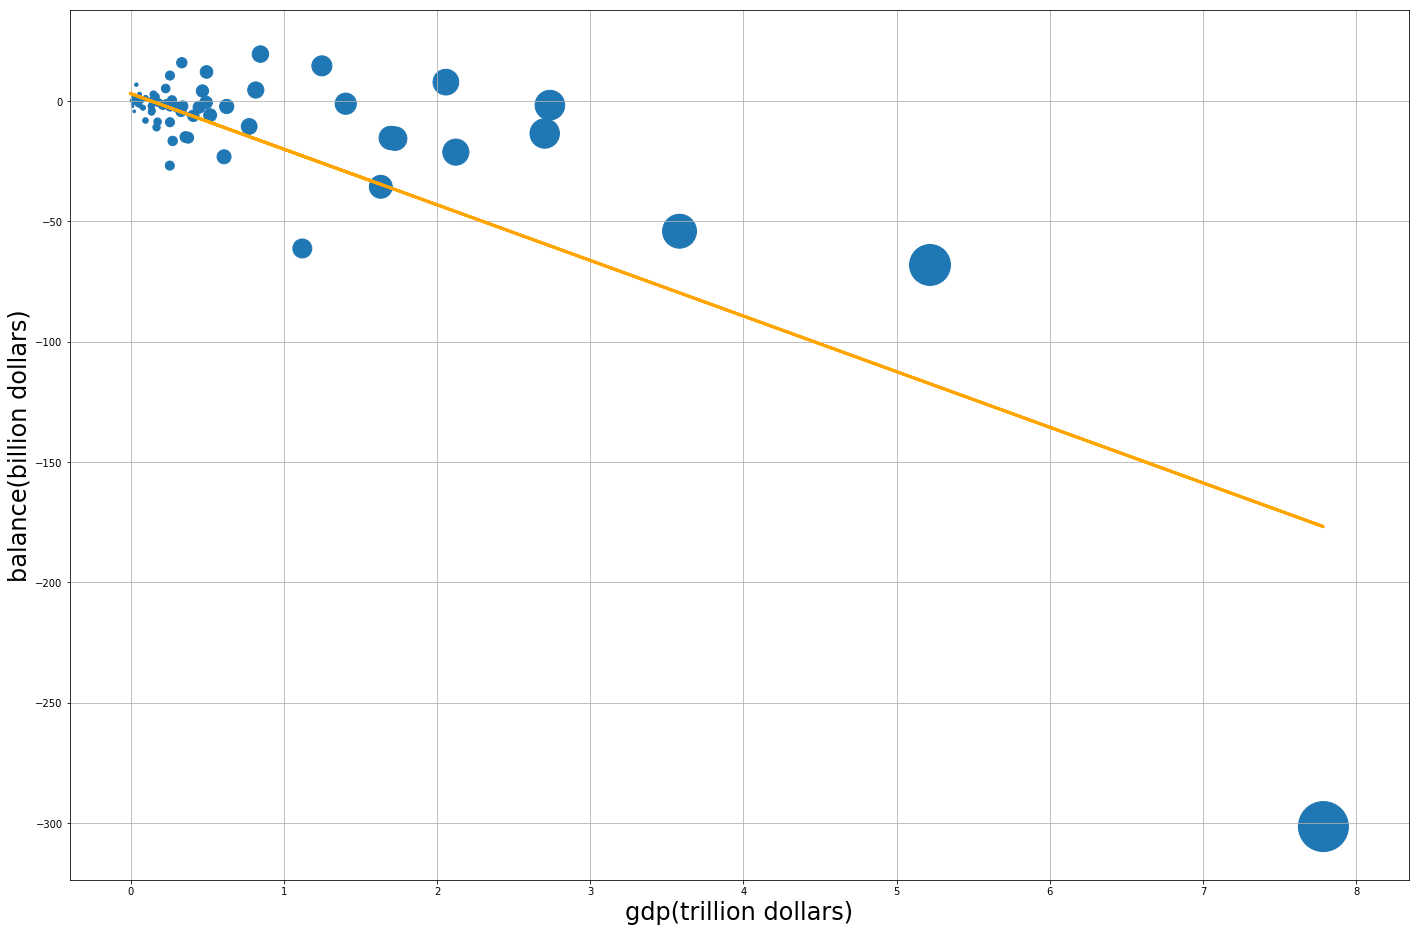

In [8]:
x_axis= np.array(mean_gdp_expo_impo_df['mean gdp'])/10**12

y_axis=np.array(mean_gdp_expo_impo_df['mean balance'])/10**9

max_x = max(x_axis)
max_y = max(y_axis)

(slope, intercept, rvalue , pvalue , _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

print(f'R^2 value is {rvalue**2}')
print(f'p value is {pvalue}')

fig, ax = plt.subplots(1,1,figsize=(24,16))


ax.plot(x_axis,fit
        ,'orange'
        ,linewidth=3)

ax.scatter( x_axis
           ,y_axis
           ,s=2500*x_axis/max_x
          )

ax.set_xlabel("gdp(trillion dollars)",fontsize=24)
ax.set_ylabel("balance(billion dollars)",fontsize=24)
ax.grid()
plt.show()

In [9]:
trace = go.Scatter(
    x = x_axis,
    y = y_axis,
    mode = 'markers'
)
trace2 = go.Scatter(
                  x=x_axis,
                  y=fit,
                  mode='lines',
                  name='Fit'
                  )
data = [trace,trace2]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')